In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,models
from tensorflow.keras.layers import Dense,Dropout,Flatten
import matplotlib.pyplot as plt
import numpy as np

(X_train,y_train),(X_test,y_test) = datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 


In [2]:
X_train = X_train/255.0
X_test = X_test/255.0

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

print("Training data shape:",X_train.shape)
print("Test data shape:",X_test.shape)

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [12]:
model = models.Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128,activation = 'relu'),
    Dropout(0.2),
    Dense(64,activation = 'relu'),
    Dense(10,activation = 'softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

model.compile(
    optimizer = tensorflow.keras.optimizers.Adam(0.001),
    loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [13]:

model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [14]:
history = model.fit(
    X_train,y_train,epochs = 10,batch_size = 4,validation_data = (X_test,y_test)
)

Epoch 1/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.9226 - loss: 0.2558 - val_accuracy: 0.9619 - val_loss: 0.1239
Epoch 2/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.9555 - loss: 0.1475 - val_accuracy: 0.9688 - val_loss: 0.1061
Epoch 3/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.9641 - loss: 0.1209 - val_accuracy: 0.9722 - val_loss: 0.0924
Epoch 4/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9675 - loss: 0.1093 - val_accuracy: 0.9714 - val_loss: 0.0972
Epoch 5/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.9699 - loss: 0.1006 - val_accuracy: 0.9711 - val_loss: 0.1032
Epoch 6/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9724 - loss: 0.0933 - val_accuracy: 0.9767 - val_loss: 0.0882
Epoch 7/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9742 - loss: 0.0867 - val_accuracy: 0.9732 - val_loss: 0.1004
Epoch 8/10
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 

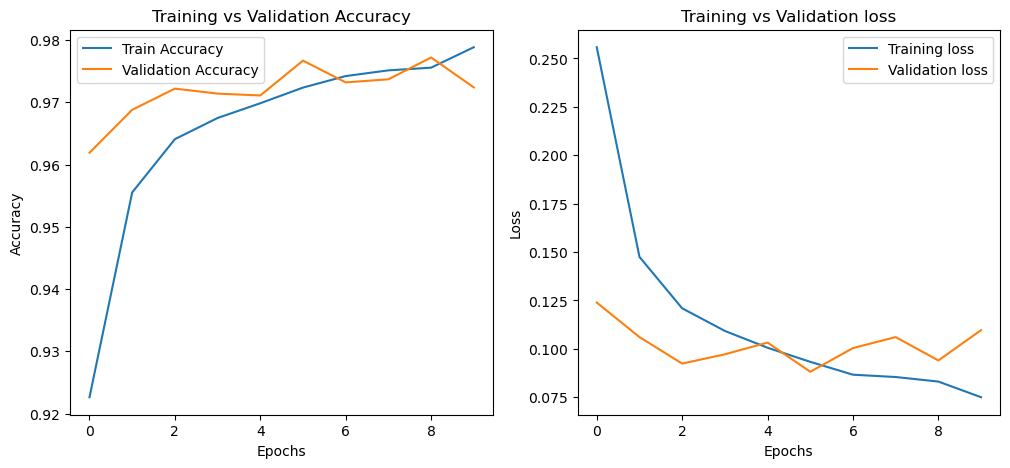

In [15]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label = 'Training loss')
plt.plot(history.history['val_loss'],label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Training vs Validation loss")
plt.legend()

plt.show()

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.9724
Test Loss: 0.1097
